In [2]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/kuand/glb-env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


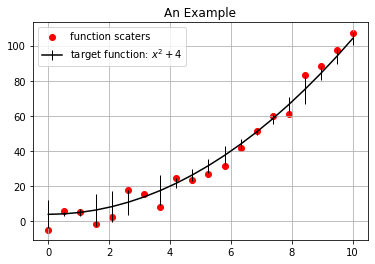

In [3]:
def base1(x, p):
    return x**p

def norm_phi(n, m, phi, w=1):
    sm = 0
    for i in range(1, N):
        sm += w*(phi(x[i], n)*phi(x[i], m) + phi(x[i-1], n)*phi(x[i-1], m)) / 2
        
    return sm

def norm_u(k, phi, u, w=1):
    sm = 0
    for i in range(1, N):
        sm += w*(phi(x[i], k)*u[i] + phi(x[i-1], k)*u[i]) / 2
        
    return sm
    
    
def f(x):
    return x**2 + 4
  
    
    
N = 20
a, b = 0, 10
x = np.linspace(a, b, N)
u = f(x) + 5 * np.random.randn(N)
delta = abs(u - f(x) + 1 * np.random.randn(N))

plt.scatter(x, u, label='function scaters', color='r')
plt.errorbar(x, f(x), delta, color='black', label='target function: $x^2 + 4$', elinewidth=1)
plt.grid(1)
plt.legend()
plt.title('An Example')
plt.show()

569.8569070776563 568.8569070776563
2


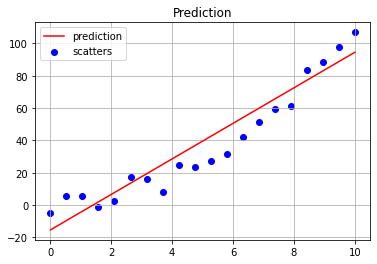

In [21]:
def solver(base, m, u=u, x=x):
    M = m
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i][j] = norm_phi(i, j, base)
    B = np.zeros(M)
    for i in range(M):
        B[i] = norm_u(i, base, u)
    C = np.zeros(M)
    C = np.linalg.solve(A, B)
        
    pred_y = []
    for n in range(N):
        sm = 0
        for k in range(M):
            sm += C[k]*base(x[n], k)
        pred_y.append(sm)

    return pred_y

def aprox(base, u=u, x=x):
    M = 0
    MSE = np.sum(delta**2)
    Real_MSE = MSE+1
    print(Real_MSE, MSE)
    while Real_MSE > MSE:
        M += 1
        Real_MSE = 0
        y_pred = solver(base, M, u=u, x=x)
        for i in range(M):
            Real_MSE += (y_pred[i] - u[i])**2
            
    return solver(base, M, u=u, x=x), M
    
re = aprox(base1)
print(re[1])
pred_y = re[0]
plt.scatter(x, u, label='scatters', color='b')
plt.plot(x, pred_y, label='prediction', color='r')
plt.grid(1)
plt.legend()
plt.title('Prediction')
plt.show()

In [17]:
MSE = np.sum(delta**2)
MSE

568.8569070776563